<a href="https://colab.research.google.com/github/Vanitharavi245/PRODIGY_ML_TaskNumber_03/blob/main/Hand_guester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

In [ ]:
zip_path = '/content/contentdrive/MyDrive/archive (5).zip'


In [ ]:
import zipfile
import os

# Define the path to the zip file in your Google Drive
zip_path = '/content/drive/MyDrive/archive (5).zip'  # Replace with the correct path
extract_path = '/content/extracted_data/'  # This will extract the data to this directory in Colab

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify files have been extracted
print("Files extracted to:", extract_path)
print("Extracted files:", os.listdir(extract_path))


Files extracted to: /content/extracted_data/
Extracted files: ['leapgestrecog', 'leapGestRecog']


In [ ]:
import os

base_dir = '/content/extracted_data/leapGestRecog'  # Path to the extracted data

# Check the structure of the base directory
for root, dirs, files in os.walk(base_dir):
    print(root, "contains", len(files), "files and", len(dirs), "subdirectories.")


/content/extracted_data/leapGestRecog contains 0 files and 10 subdirectories.
/content/extracted_data/leapGestRecog/02 contains 0 files and 10 subdirectories.
/content/extracted_data/leapGestRecog/02/08_palm_moved contains 200 files and 0 subdirectories.
/content/extracted_data/leapGestRecog/02/02_l contains 200 files and 0 subdirectories.
/content/extracted_data/leapGestRecog/02/03_fist contains 200 files and 0 subdirectories.
/content/extracted_data/leapGestRecog/02/05_thumb contains 200 files and 0 subdirectories.
/content/extracted_data/leapGestRecog/02/10_down contains 200 files and 0 subdirectories.
/content/extracted_data/leapGestRecog/02/04_fist_moved contains 200 files and 0 subdirectories.
/content/extracted_data/leapGestRecog/02/06_index contains 200 files and 0 subdirectories.
/content/extracted_data/leapGestRecog/02/09_c contains 200 files and 0 subdirectories.
/content/extracted_data/leapGestRecog/02/07_ok contains 200 files and 0 subdirectories.
/content/extracted_data/l

In [ ]:

# Define paths to your data directories
train_dir = '/content/extracted_data/leapGestRecog'  # Update this with the correct path

# Data Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Found 20000 images belonging to 10 classes.


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1249s 2s/step - accuracy: 0.8858 - loss: 0.3134
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1281s 2s/step - accuracy: 0.9098 - loss: 0.2569
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1292s 2s/step - accuracy: 0.9375 - loss: 0.1697
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 15us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1276s 2s/step - accuracy: 0.9462 - loss: 0.1447
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1268s 2s/step - accuracy: 0.9500 - loss: 0.1339
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 15us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


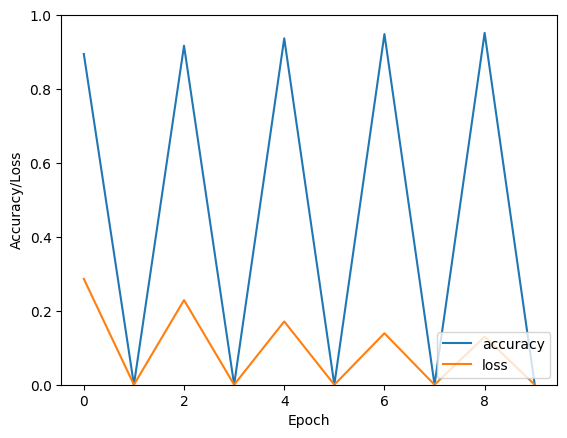

In [ ]:

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=10
)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save('hand_gesture_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from tensorflow.keras.models import load_model

# Load the previously trained model (if you saved it)
model_path = '/content/hand_gesture_model.h5'  # Update with the correct path
model = load_model(model_path)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // 32)

# Print test accuracy and loss
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


625/625 [==============================] - 369s 589ms/step - loss: 23.0354 - accuracy: 0.0253
Test Accuracy: 2.53%
Test Loss: 23.0354


In [ ]:
# Set up image data generator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Rescale pixel values
    rotation_range=30,      # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2, # Randomly shift images vertically
    shear_range=0.2,        # Randomly shear images
    zoom_range=0.2,         # Randomly zoom into images
    horizontal_flip=True,   # Randomly flip images
    validation_split=0.2    # Split for validation
)

# Set up data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),  # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='training'        # Use subset for training
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'      # Use subset for validation
)


Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [ ]:
# Build the model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # 10 output classes for gestures

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Set up image data generator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Rescale pixel values
    rotation_range=20,     # Reduced rotation range
    width_shift_range=0.1, # Reduced shift range
    height_shift_range=0.1, # Reduced shift range
    shear_range=0.1,       # Reduced shear range
    zoom_range=0.1,        # Reduced zoom range
    horizontal_flip=True,  # Randomly flip images
    validation_split=0.2   # Split for validation
)

# Set up data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),   # Smaller image size
    batch_size=64,          # Increased batch size
    class_mode='categorical',
    subset='training'       # Use subset for training
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),   # Smaller image size
    batch_size=64,          # Increased batch size
    class_mode='categorical',
    subset='validation'     # Use subset for validation
)

# Build the model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # 10 output classes for gestures

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5 # Choose an appropriate number of epochs
)


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5 # Choose an appropriate number of epochs
)


Epoch 1/5
500/500 [==============================] - 848s 2s/step - loss: 0.6428 - accuracy: 0.7626 - val_loss: 0.8109 - val_accuracy: 0.7092
Epoch 2/5
500/500 [==============================] - 816s 2s/step - loss: 0.4814 - accuracy: 0.8232 - val_loss: 0.7550 - val_accuracy: 0.7375
Epoch 3/5
500/500 [==============================] - 824s 2s/step - loss: 0.4008 - accuracy: 0.8539 - val_loss: 0.5258 - val_accuracy: 0.8155
Epoch 4/5
500/500 [==============================] - 808s 2s/step - loss: 0.3480 - accuracy: 0.8735 - val_loss: 0.5577 - val_accuracy: 0.8090
Epoch 5/5
500/500 [==============================] - 815s 2s/step - loss: 0.3027 - accuracy: 0.8902 - val_loss: 0.5596 - val_accuracy: 0.8030


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')


125/125 [==============================] - 73s 584ms/step - loss: 0.5553 - accuracy: 0.8058
Test accuracy: 0.8057500123977661


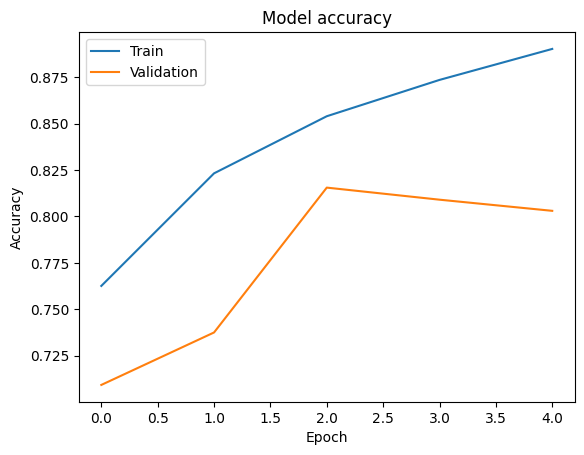

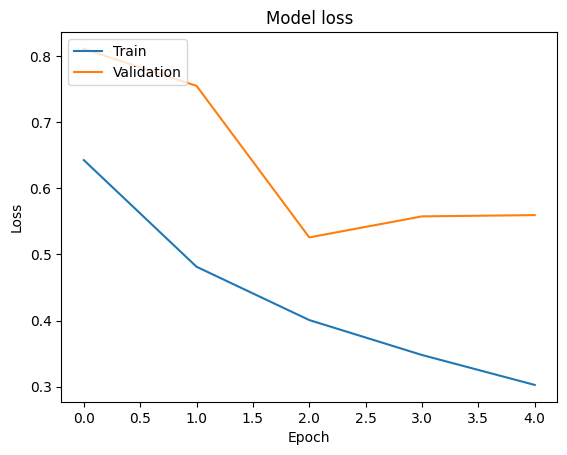

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


##Interpretation:

Loss Plot Interpretation:
Training Loss:

The training loss consistently decreases across the epochs, starting from approximately 0.64 and dropping to 0.30 by the end of epoch 5.
This shows that the model is successfully learning the patterns in the training data, as expected.
Validation Loss:

The validation loss initially decreases significantly from 0.81 in the first epoch to 0.52 in epoch 3.
After epoch 3, the validation loss plateaus and even slightly increases, staying around 0.55. This suggests the model might be overfitting after a certain point. The model starts to memorize the training data rather than generalizing well to the validation set.
Accuracy Results from Epochs:
Training Accuracy:

The model shows steady improvement in accuracy, rising from 76.26% in the first epoch to 89.02% by epoch 5.
This implies that the model is performing well on the training data.
Validation Accuracy:

The validation accuracy also improves, from 70.92% in epoch 1 to a peak of 81.55% by epoch 3.
Similar to the loss, after epoch 3, validation accuracy slightly decreases, reaching 80.30% by the end of epoch 5.
This further indicates overfitting after epoch 3.
Test Results:
Test Accuracy:
After training, the model achieved a test accuracy of 80.58%, which is very close to the validation accuracy, indicating consistent performance across validation and test datasets.
Conclusion & Recommendations for Hand Gesture Recognition Model:
Given that you're developing a hand gesture recognition model, here are some thoughts based on your current results:

Good Starting Point: Your model already performs well, achieving around 80-81% accuracy in both validation and test sets. This is a solid foundation for recognizing and classifying hand gestures.

Overfitting Concern: There is a sign of overfitting after epoch 3, where the validation accuracy peaks and then slightly drops while training accuracy continues to improve. To combat this:

Early Stopping: You can use early stopping to halt training when validation accuracy starts decreasing, which could help prevent overfitting.
Regularization: Introduce more dropout layers or L2 regularization in the fully connected layers to mitigate overfitting.
Increase Data Augmentation: Try to further augment the training data (e.g., adding more types of transformations or creating synthetic data) to improve the model's generalization ability.
Optimizing Performance for Gesture Recognition:

More Data: Adding more training data (if possible) or leveraging pre-trained models like MobileNetV2 or ResNet50 could improve your model's ability to recognize hand gestures with better accuracy.
Fine-Tuning: You might want to fine-tune the learning rate or optimizer (e.g., using SGD with momentum) to find a better convergence point.
Real-Time Implementation: Since you’re aiming for gesture-based control systems, consider optimizing your model for inference speed, especially if you plan to deploy this in real-time applications.